In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
def train_and_plot(X_train, y_train, X_test, y_test, penalty="l2"):
    print(f"Penalty {penalty}")
    if penalty=='elasticnet':
        model = LogisticRegression(solver='saga', penalty=penalty, l1_ratio=0.7)
    else:
        model = LogisticRegression(solver='saga', penalty=penalty)
    pipe = Pipeline([
        ('scaler', StandardScaler()), 
        ('lr', model)])
    
    pipe.fit(X_train, y_train)
    print(pipe.score(X_test, y_test))
    importance = model.coef_[0]

    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

Penalty none
0.9840425531914894


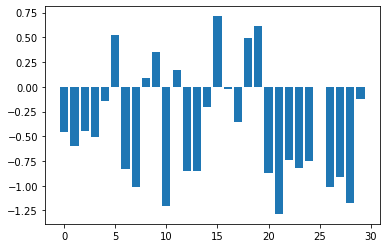

Penalty l2
0.9893617021276596


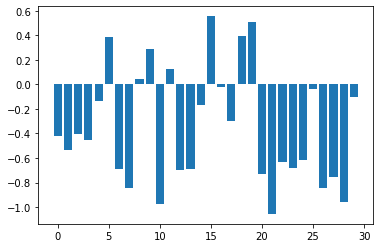

Penalty l1
0.9840425531914894


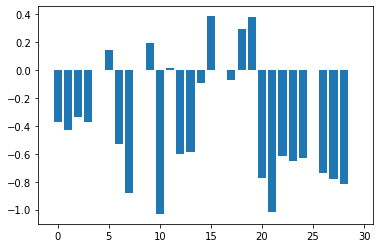

In [6]:
train_and_plot(X_train, y_train, X_test, y_test, "none")
train_and_plot(X_train, y_train, X_test, y_test, "l2")
train_and_plot(X_train, y_train, X_test, y_test, "l1")


In [9]:
X_train_outlier = X_train.append(X_train.iloc[172]*10,  ignore_index=True)
y_train_outlier = y_train.append(pd.Series([1]), ignore_index=True)

Penalty none
0.9095744680851063


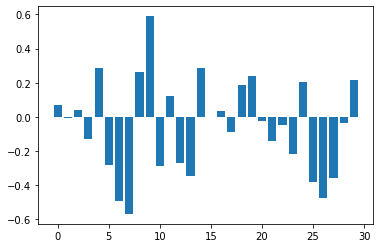

Penalty l2
0.9095744680851063


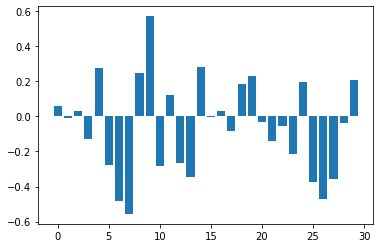

Penalty l1
0.9148936170212766


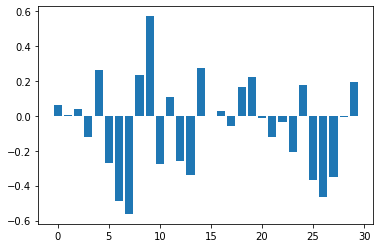

In [10]:
train_and_plot(X_train_outlier, y_train_outlier, X_test, y_test, "none")
train_and_plot(X_train_outlier, y_train_outlier, X_test, y_test, "l2")
train_and_plot(X_train_outlier, y_train_outlier, X_test, y_test, "l1")


## Example in Class

In [11]:
#from sklearn.datasets import load_iris
#data = load_iris()

#X = data.data
#y = data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
clf =LogisticRegression(penalty = 'l2')
clfn = LogisticRegression(penalty = 'none')

In [13]:
clf.fit(X_train, y_train)

LogisticRegression()

In [14]:
clfn.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [15]:
clf.predict(X_test)
y_pred = clf.predict(X_test)
y_predn = clfn.predict(X_test)

In [16]:
print(y_pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 0 1]


In [17]:
clf.score(X_test, y_test)
print(clf.score(X_test, y_test))

print(clfn.score(X_test, y_test))

0.9680851063829787
0.9680851063829787


In [18]:
from sklearn.metrics import confusion_matrix

clf_matrix = confusion_matrix(y_test, y_pred)
print(clf_matrix)

clfn_matrix = confusion_matrix(y_test, y_predn)
print(clfn_matrix)



[[ 64   3]
 [  3 118]]
[[ 64   3]
 [  3 118]]


In [19]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_predn))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

